# Explore here

In [5]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
load_dotenv()

True

In [7]:
# Get credentials
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

# Authenticate with Spotify
spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))

# Birdy's Spotify URI
bad_bunny = 'spotify:artist:4q3ewBCX7sLwd24euuV69X'

# Fetch albums
results = spotify.artist_albums(bad_bunny, album_type='album')
albums = results['items']
while results['next']:
    results = spotify.next(results)
    albums.extend(results['items'])

In [15]:
# Get top tracks
top_tracks_results = spotify.artist_top_tracks(bad_bunny)

top_tracks_data = [{
    'name': track['name'],
    'popularity': track['popularity'],
    'album': track['album']['name'],
    'release_date': track['album']['release_date'],
} for track in top_tracks_results['tracks']]

df_top_tracks = pd.DataFrame(top_tracks_data)
df_top_tracks.sort_values('popularity', ascending=False, inplace=True)

# Show top 5 most played songs
print("\nTop 5 Bad Bunny's Most Popular Songs:")
print(df_top_tracks.head(5))


Top 5 Bad Bunny's Most Popular Songs:
                   name  popularity                 album release_date
0                  DtMF          98  DeBÍ TiRAR MáS FOToS   2025-01-05
1     BAILE INoLVIDABLE          97  DeBÍ TiRAR MáS FOToS   2025-01-05
2              NUEVAYoL          94  DeBÍ TiRAR MáS FOToS   2025-01-05
3                   EoO          94  DeBÍ TiRAR MáS FOToS   2025-01-05
4  VOY A LLeVARTE PA PR          94  DeBÍ TiRAR MáS FOToS   2025-01-05


/tmp/ipykernel_19216/476533801.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_tracks.head(5), x='estimated_streams_millions', y='name', palette='viridis')


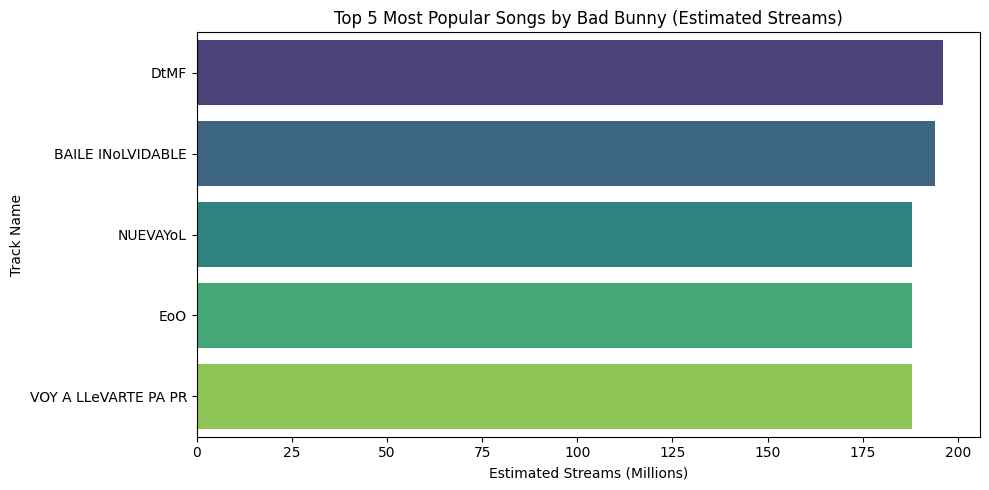

In [16]:
df_top_tracks['estimated_streams_millions'] = df_top_tracks['popularity'] * 2  

plt.figure(figsize=(10, 5))
sns.barplot(data=df_top_tracks.head(5), x='estimated_streams_millions', y='name', palette='viridis')
plt.title("Top 5 Most Popular Songs by Bad Bunny (Estimated Streams)")
plt.xlabel("Estimated Streams (Millions)")
plt.ylabel("Track Name")
plt.tight_layout()
plt.show()

